# Imports

In [ ]:
import pandas as pd
import numpy as np
import random

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
#import GridSearchCV
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold, cross_val_predict, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, auc, classification_report, roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn import svm
from sklearn.neural_network import MLPClassifier

import time

# Data, Preprocessing and EDA

In [ ]:
df = pd.read_csv('../content/sample_data/heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [ ]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
print("Sex:",df['Sex'].unique())
print("RestingECG:",df['RestingECG'].unique())
print("ChestPainType:",df['ChestPainType'].unique())
print("ExerciseAngina:",df['ExerciseAngina'].unique())
print("ST_Slope:",df['ST_Slope'].unique())

Sex: ['M' 'F']
RestingECG: ['Normal' 'ST' 'LVH']
ChestPainType: ['ATA' 'NAP' 'ASY' 'TA']
ExerciseAngina: ['N' 'Y']
ST_Slope: ['Up' 'Flat' 'Down']


In [ ]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['RestingECG'] = label_encoder.fit_transform(df['RestingECG'])
df['ChestPainType'] = label_encoder.fit_transform(df['ChestPainType'])
df['ExerciseAngina'] = label_encoder.fit_transform(df['ExerciseAngina'])
df['ST_Slope'] = label_encoder.fit_transform(df['ST_Slope'])

df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [ ]:
x = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

In [ ]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [ ]:
x.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,140,289,0,1,172,0,0.0,2
1,49,0,2,160,180,0,1,156,0,1.0,1
2,37,1,1,130,283,0,2,98,0,0.0,2
3,48,0,0,138,214,0,1,108,1,1.5,1
4,54,1,2,150,195,0,1,122,0,0.0,2


Plotting Dataset

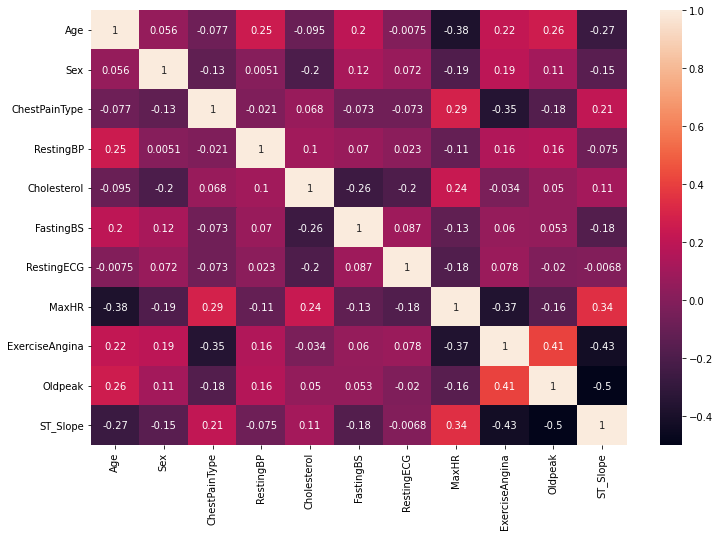

In [ ]:
fig = plt.figure(figsize=(12,8))
ax = sns.heatmap(x.corr(), annot=True)
plt.show()
fig.savefig('heatmap')

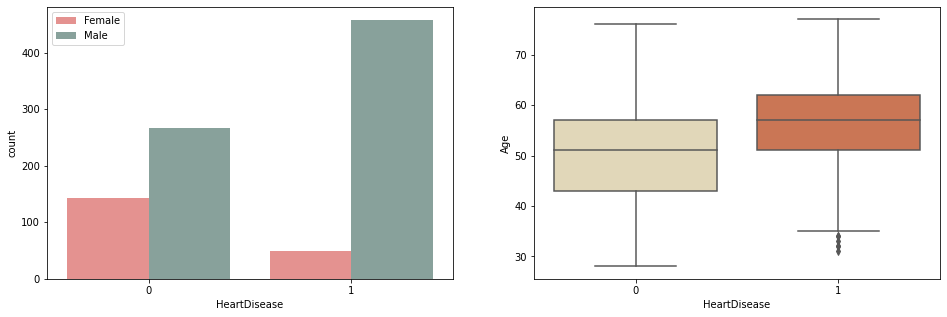

In [ ]:
p = ['#e8dab2','#dd6e42']
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))
sns.countplot(data=df, x='HeartDisease', hue='Sex', ax=ax1, palette=sns.color_palette(['#f28482', '#84a59d']))
sns.boxplot(data=df, y='Age', x='HeartDisease', ax=ax2, palette=sns.color_palette(p))
ax1.legend(['Female', 'Male']);
fig.savefig('hist_box')

<ipython-input-40-4588d18ebc32>:7: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax1.set_xticks([0, 1, 2, 3], ChestPain)


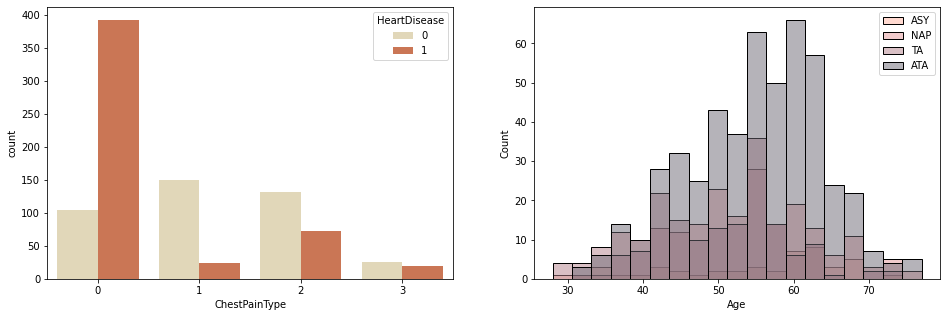

In [ ]:
ChestPain = ['ASY', 'NAP', 'TA', 'ATA']

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 5))
sns.countplot(data=df, x='ChestPainType', hue='HeartDisease', ax=ax1, palette=sns.color_palette(p))
sns.histplot(data=df, x='Age', hue='ChestPainType', ax=ax2,
             palette=sns.color_palette(['#6d6875', '#b5838d', '#e5989b', '#ffb4a2']))
ax1.set_xticks([0, 1, 2, 3], ChestPain)
ax2.legend(ChestPain);

fig.savefig('chestpain_Age_dataset2')

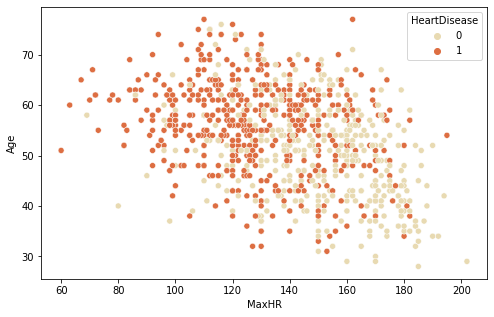

In [ ]:
fig = plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='MaxHR', y='Age', hue='HeartDisease', palette=sns.color_palette(p));

fig.savefig('scatterplot_dataset2')

**Splitting Training and Test Data**

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test,y_train,y_test = train_test_split(x,y,test_size =0.3, random_state=10)

# print the data
x_train

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
913,45,1,3,110,264,0,1,132,0,1.2,1
7,54,1,1,110,208,0,1,142,0,0.0,2
687,70,1,1,156,245,0,0,143,0,0.0,2
808,35,1,0,126,282,0,0,156,1,0.0,2
765,41,1,2,112,250,0,1,179,0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...
369,63,1,0,150,0,0,1,86,1,2.0,1
320,59,1,2,125,0,1,1,175,0,2.6,1
527,61,1,1,139,283,0,1,135,0,0.3,2
125,54,1,1,120,246,0,1,110,0,0.0,2


In [ ]:
print('x_train: ', x_train.shape)
print('x_test: ', x_test.shape)
print('y_train: ', y_train.shape)
print('y_test: ', y_test.shape)

x_train:  (642, 11)
x_test:  (276, 11)
y_train:  (642,)
y_test:  (276,)


# Decision Tree with Pruning

Time taken to train the multiple hidden NN model generalized:  9.620357751846313 seconds
train accuracy [0.8223557692307694, 0.8223557692307694, 0.8223557692307694, 0.8223557692307694, 0.8223557692307694, 0.8223557692307694, 0.8223557692307694, 0.8223557692307694, 0.8223557692307694, 0.8223557692307694, 0.8286538461538463, 0.8286538461538463, 0.8286538461538463, 0.8286538461538463, 0.8286538461538463, 0.8488221153846155, 0.8472596153846155, 0.8456971153846154, 0.8456971153846154, 0.8456971153846154, 0.806826923076923, 0.811514423076923, 0.8162019230769231, 0.8084134615384615, 0.811514423076923, 0.8099999999999999, 0.8162259615384615, 0.8224759615384615, 0.813125, 0.8115625, 0.7789423076923077, 0.8006971153846154, 0.8053125, 0.7959615384615384, 0.7976201923076923, 0.8006009615384615, 0.8021874999999999, 0.8068509615384615, 0.7975, 0.7975240384615384, 0.8022355769230769, 0.7976201923076923, 0.8053125, 0.8053125, 0.8006249999999999, 0.7975961538461538, 0.8006009615384615, 0.80521634615384

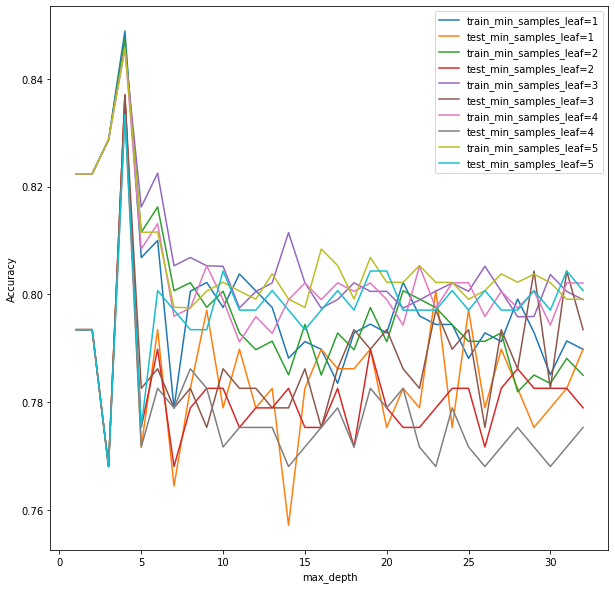

In [ ]:
start_time = time.time()

max_depths = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]
min_samples_leafs = [1, 2, 3, 4, 5]

train_accuracies = []
test_accuracies = []

for i in max_depths:
    for j in min_samples_leafs:
        dtc = DecisionTreeClassifier(criterion="entropy", max_depth=i, min_samples_leaf=j)

        scores = cross_val_score(dtc, x_train, y_train, cv=10)
        train_accuracies.append(scores.mean())

        dtc.fit(x_train, y_train)
        test_accuracies.append(dtc.score(x_test, y_test))

print("Time taken to train the multiple hidden NN model generalized: ", time.time() - start_time, "seconds")

print('train accuracy', train_accuracies)
print('test accuracy', test_accuracies)

train_accuracies_plot = np.array(train_accuracies).reshape(-1, len(min_samples_leafs))
test_accuracies_plot = np.array(test_accuracies).reshape(-1, len(min_samples_leafs))

fig, ax = plt.subplots(figsize=(10,10))

for i in range(len(min_samples_leafs)):
    ax.plot(max_depths, train_accuracies_plot[:, i], label='train_min_samples_leaf='+str(min_samples_leafs[i]))
    ax.plot(max_depths, test_accuracies_plot[:, i], label='test_min_samples_leaf='+str(min_samples_leafs[i]))

ax.set_xlabel('max_depth')
ax.set_ylabel('Accuracy')
ax.legend()
plt.show()



Accuracy

In [ ]:
start_time = time.time()
# Train the decision tree classifier
clf = DecisionTreeClassifier(max_depth=3, min_samples_leaf=1)
clf = clf.fit(x_train, y_train)

print("Time taken to train the DT model: ", time.time() - start_time, "seconds")
# Evaluate the accuracy of the model on the test data
dt_accuracy = clf.score(x_test, y_test)
print("Accuracy:", dt_accuracy)

Time taken to train the DT model:  0.003937482833862305 seconds
Accuracy: 0.8297101449275363


Hyperparameter tuning

In scikit-learn, you can perform hyperparameter tuning by using techniques such as Grid Search and Randomized Search. Grid Search is a brute-force approach that trains a model for every combination of hyperparameters specified in a grid, while Randomized Search samples the hyperparameter space randomly to find the best set of hyperparameters.

In [ ]:
# Define the parameter grid to search over
#param_grid = {'max_depth': [1, 2, 3, 4, 5], 'min_samples_leaf': [1, 2, 3, 4, 5]}
param_grid = {'max_depth': [8, 9, 10, 11], 'min_samples_leaf': [8, 9, 10, 11, 12]}

# Train the decision tree classifier with grid search
clf = DecisionTreeClassifier()
grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(x_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the final model with the best hyperparameters
clf = DecisionTreeClassifier(max_depth=best_params['max_depth'], min_samples_leaf=best_params['min_samples_leaf'])
clf.fit(x_train, y_train)

# Evaluate the accuracy of the final model on the test data
tuning_accuracy = clf.score(x_test, y_test)
print("Accuracy:", tuning_accuracy)

Accuracy: 0.8007246376811594


Observation with scaled data

In [ ]:
# Get the original feature names
# feature_names = x.columns

# Define the scaler
scaler = StandardScaler().fit(x_train)

# Scale the train set
x_train_scaled = scaler.transform(x_train)

# Scale the test set
x_test_scaled = scaler.transform(x_test)

# Add the feature names back to the scaled data
# x_train_scaled = pd.DataFrame(x_test_scaled, columns=feature_names)
# x_test_scaled = pd.DataFrame(x_test_scaled, columns=feature_names)

In [ ]:
# Define the parameter grid to search over
# param_grid = {'max_depth': [1, 2, 3, 4, 5], 'min_samples_leaf': [1, 2, 3, 4, 5]}
param_grid = {'max_depth': [8, 9, 10, 11], 'min_samples_leaf': [8, 9, 10, 11, 12]}

# Train the decision tree classifier with grid search
clf = DecisionTreeClassifier()
grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(x_train_scaled, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the final model with the best hyperparameters
clf = DecisionTreeClassifier(max_depth=best_params['max_depth'], min_samples_leaf=best_params['min_samples_leaf'])
clf.fit(x_train, y_train)

# Evaluate the accuracy of the final model on the test data
dt_scaled_accuracy = clf.score(x_test_scaled, y_test)
print("Accuracy:", dt_scaled_accuracy)

Accuracy: 0.5942028985507246


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Confusion Matrix

In [ ]:
# Calculate the confusion matrix
clf.fit(x_train, y_train)

# Predict on the test set
y_pred = clf.predict(x_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

Visualize confusion Matrix

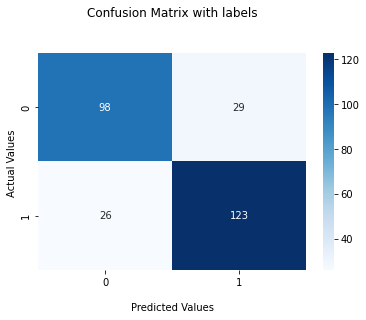

In [ ]:
# now, visualize confusion metrix

ax = sns.heatmap(cm, annot=True,fmt='g', cmap='Blues')

ax.set_title('Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');


## Display the visualization of the Confusion Matrix.
plt.show()

**Classification Report**

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.77      0.78       127
           1       0.81      0.83      0.82       149

    accuracy                           0.80       276
   macro avg       0.80      0.80      0.80       276
weighted avg       0.80      0.80      0.80       276



**ROC Curve**

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

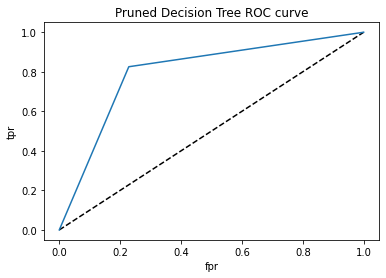

In [ ]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='DT')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Pruned Decision Tree ROC curve')
plt.show()

In [ ]:
roc_auc_score(y_test,y_pred)

0.7985784495058923

**Cross Validation Score**

In [ ]:
scores = cross_val_score(clf, x_train, y_train, cv=5, scoring='accuracy')

# Print the mean and standard deviation of the scores
print("Mean cross-validation score: ", scores.mean())
print("Standard deviation of the scores: ", scores.std())

Mean cross-validation score:  0.8411216085271317
Standard deviation of the scores:  0.01607136522971007


# Neural Network

In [ ]:
start_time = time.time()
# Train a neural network classifier with single layer
clf = MLPClassifier(max_iter=1000, random_state=0)
clf.fit(x_train, y_train)

print("Time taken to train the NN model: ", time.time() - start_time, "seconds")

# Predict the class labels for the test set
y_pred = clf.predict(x_test)

Time taken to train the NN model:  0.4912071228027344 seconds


**Neural Network Accuracy**

In [ ]:
# Calculate the accuracy on the test data
nn_accuracy = clf.score(x_test, y_test)
print("Accuracy:", nn_accuracy)

Accuracy: 0.8043478260869565


Time taken to train the multiple hidden NN model:  8.241636514663696 seconds
Train accuracy [0.559190031152648, 0.440809968847352, 0.8551401869158879, 0.838006230529595, 0.8660436137071651, 0.8504672897196262, 0.8489096573208723, 0.867601246105919, 0.8317757009345794, 0.8271028037383178, 0.8613707165109035, 0.8598130841121495, 0.867601246105919, 0.8644859813084113]
Test Accuracy [0.5398550724637681, 0.4601449275362319, 0.8115942028985508, 0.8007246376811594, 0.8188405797101449, 0.8115942028985508, 0.8297101449275363, 0.8152173913043478, 0.822463768115942, 0.8297101449275363, 0.822463768115942, 0.8188405797101449, 0.8115942028985508, 0.8043478260869565]


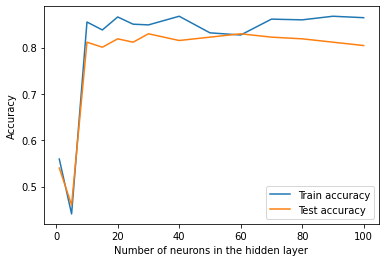

In [ ]:
#Random hidden layers

# List of different numbers of neurons in the hidden layer
hidden_layer_sizes = [1, 5, 10, 15, 20, 25, 30, 40, 50, 60, 70, 80, 90, 100]

# Initialize lists to store accuracy scores
train_accuracy = []
test_accuracy = []

start_time = time.time()
# Train the classifier with different numbers of neurons in the hidden layer
for n in hidden_layer_sizes:
    clf_n = MLPClassifier(hidden_layer_sizes=(n,), max_iter=1000, random_state=0)
    clf_n.fit(x_train, y_train)

    # Evaluate the accuracy on the train and test sets
    train_accuracy.append(clf_n.score(x_train, y_train))
    test_accuracy.append(clf_n.score(x_test, y_test))

print("Time taken to train the multiple hidden NN model: ", time.time() - start_time, "seconds")

print('Train accuracy', train_accuracy)
print('Test Accuracy', test_accuracy)

# Plot the accuracy vs number of neurons in the hidden layer
plt.plot(hidden_layer_sizes, train_accuracy, label='Train accuracy')
plt.plot(hidden_layer_sizes, test_accuracy, label='Test accuracy')
plt.xlabel('Number of neurons in the hidden layer')
plt.ylabel('Accuracy')
plt.legend()
plt.show()




Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X

Time taken to train the multiple hidden NN model generalized:  16.339995622634888 seconds
Train accuracy [0.559190031152648, 0.440809968847352, 0.8551401869158879, 0.838006230529595, 0.8660436137071651, 0.8504672897196262, 0.8489096573208723, 0.867601246105919, 0.8317757009345794, 0.8271028037383178, 0.8613707165109035, 0.8598130841121495, 0.867601246105919, 0.8644859813084113]
Test Accuracy [0.5398550724637681, 0.4601449275362319, 0.8115942028985508, 0.8007246376811594, 0.8188405797101449, 0.8115942028985508, 0.8297101449275363, 0.8152173913043478, 0.822463768115942, 0.8297101449275363, 0.822463768115942, 0.8188405797101449, 0.8115942028985508, 0.8043478260869565]


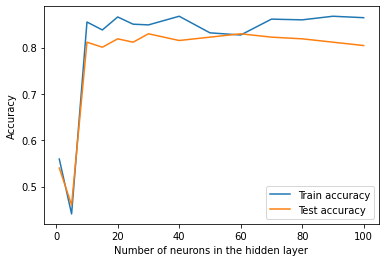

In [ ]:
# Initialize lists to store accuracy scores
train_accuracy2 = []
test_accuracy2 = []

start_time = time.time()
# for i in hidden_layer_sizes:
#     mlp = MLPClassifier(hidden_layer_sizes=(i,), activation='relu', solver='adam', alpha=0.0001, batch_size='auto',
#                         learning_rate='constant', learning_rate_init=0.001, max_iter=200, shuffle=True, random_state=1,
#                         tol=0.0001, early_stopping=True, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08,
#                         n_iter_no_change=10, momentum=0.9, nesterovs_momentum=True, power_t=0.5,
#                         warm_start=False)

#     scores = cross_val_score(mlp, x_train, y_train, cv=10)
#     train_accuracy2.append(scores.mean())

#     mlp.fit(x_train, y_train)
#     test_accuracy2.append(mlp.score(x_test, y_test))

for i in hidden_layer_sizes:
    mlp = MLPClassifier(hidden_layer_sizes=(i,), activation='relu', solver='adam', alpha=0.0001, batch_size='auto',
                        learning_rate='constant', learning_rate_init=0.001, max_iter=200, shuffle=True, random_state=1,
                        tol=0.0001, early_stopping=True, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08,
                        n_iter_no_change=10, momentum=0.9, nesterovs_momentum=True, power_t=0.5,
                        warm_start=False)

    scores = cross_val_score(mlp, x_train, y_train, cv=10)
    train_accuracy2.append(scores.mean())

    mlp.fit(x_train, y_train)
    test_accuracy2.append(mlp.score(x_test, y_test))

print("Time taken to train the multiple hidden NN model generalized: ", time.time() - start_time, "seconds")

print('Train accuracy', train_accuracy)
print('Test Accuracy', test_accuracy)

# Plot the accuracy vs number of neurons in the hidden layer
plt.plot(hidden_layer_sizes, train_accuracy, label='Train accuracy')
plt.plot(hidden_layer_sizes, test_accuracy, label='Test accuracy')
plt.xlabel('Number of neurons in the hidden layer')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**Confusion Matrix**

In [ ]:
# Predict on the test set
y_pred_nn = clf.predict(x_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_nn)

Visualize Confusion Matrix

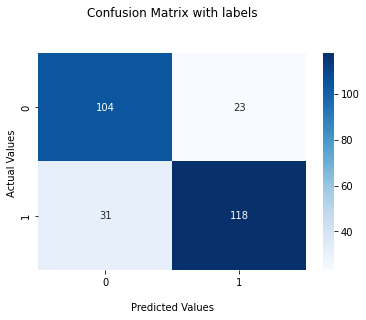

In [ ]:
# now, visualize confusion metrix

ax = sns.heatmap(cm, annot=True,fmt='g', cmap='Blues')

ax.set_title('Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');


## Display the visualization of the Confusion Matrix.
plt.show()

**Classification Report**

In [ ]:
print(classification_report(y_test,y_pred_nn))

              precision    recall  f1-score   support

           0       0.77      0.82      0.79       127
           1       0.84      0.79      0.81       149

    accuracy                           0.80       276
   macro avg       0.80      0.81      0.80       276
weighted avg       0.81      0.80      0.80       276



**ROC Curve**

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_nn)

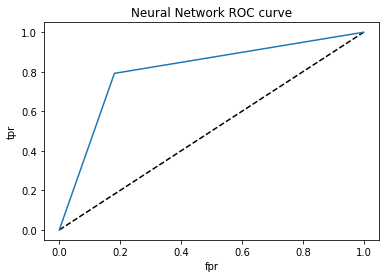

In [ ]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='NN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Neural Network ROC curve')
plt.show()

In [ ]:
roc_auc_score(y_test,y_pred_nn)

0.8054219732600539

**Cross Validation Score**

In [ ]:
scores = cross_val_score(clf, x_train, y_train, cv=5, scoring='accuracy')

# Print the mean and standard deviation of the scores
print("Mean cross-validation score: ", scores.mean())
print("Standard deviation of the scores: ", scores.std())

Mean cross-validation score:  0.8426841085271317
Standard deviation of the scores:  0.03210672504688985


Grid Search CV

In [ ]:
param_grid = {'hidden_layer_sizes': [(50,50,50), (100,)],
              'activation': ['tanh', 'relu'],
              'solver': ['adam', 'sgd'],
              'alpha': [0.0001, 0.05],
              'learning_rate': ['constant', 'adaptive']}

# Create the GridSearchCV object
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(x_train, y_train)

# Print the best parameters and best score found
print("Best parameters: ", grid_search.best_params_)
print("Best accuracy: ", grid_search.best_score_)

Best parameters:  {'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'solver': 'adam'}
Best accuracy:  0.8442587209302325


# KNN

**KNN Model**

In [ ]:
start_time = time.time()
#Setup arrays to store training and test accuracies
neighbors = np.arange(1,13)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)

    #Fit the model
    knn.fit(x_train, y_train)

    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(x_train, y_train)

    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(x_test, y_test)

print("Time taken to train the KNN model: ", time.time() - start_time, "seconds")

Time taken to train the KNN model:  0.4196751117706299 seconds


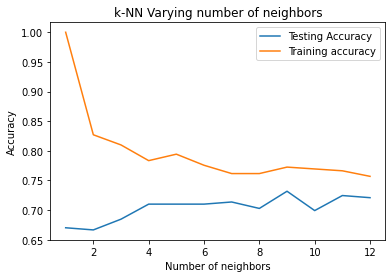

In [ ]:
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=9)

In [ ]:
#Fit the model
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=9)

In [ ]:
#Get accuracy. Note: In case of classification algorithms score method represents accuracy.
knn_accuracy = knn.score(x_test,y_test)
print(knn_accuracy)

0.7318840579710145


In [ ]:
#let us get the predictions using the classifier we had fit above
y_pred_knn = knn.predict(x_test)

**Confustion Matrix**

In [ ]:
cm = confusion_matrix(y_test,y_pred_knn)

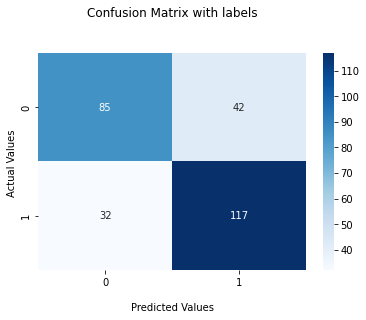

In [ ]:
# now, visualize confusion metrix

ax = sns.heatmap(cm, annot=True,fmt='g', cmap='Blues')

ax.set_title('Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');


## Display the visualization of the Confusion Matrix.
plt.show()

**Classification Report**

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.82      0.79       127
           1       0.84      0.79      0.81       149

    accuracy                           0.80       276
   macro avg       0.80      0.81      0.80       276
weighted avg       0.81      0.80      0.80       276



ROC (Reciever Operating Charecteristic) curve

It is a plot of the true positive rate against the false positive rate for the different possible cutpoints of a diagnostic test.

An ROC curve demonstrates several things:

1) It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).

2) The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.

3)The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

4) The area under the curve is a measure of test accuracy.

In [ ]:
y_pred_proba = knn.predict_proba(x_test)[:,1]

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

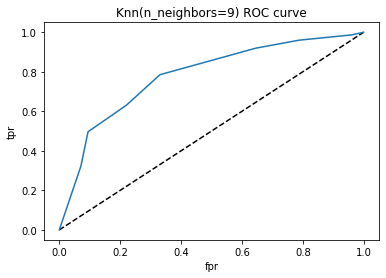

In [ ]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=9) ROC curve')
plt.show()

In [ ]:
roc_auc_score(y_test,y_pred_proba)

0.7794747133118428

Cross Validation

Now before getting into the details of Hyperparamter tuning, let us understand the concept of Cross validation.

The trained model's performance is dependent on way the data is split. It might not representative of the model’s ability to generalize.

The solution is cross validation.

Cross-validation is a technique to evaluate predictive models by partitioning the original sample into a training set to train the model, and a test set to evaluate it.

In k-fold cross-validation, the original sample is randomly partitioned into k equal size subsamples. Of the k subsamples, a single subsample is retained as the validation data for testing the model, and the remaining k-1 subsamples are used as training data. The cross-validation process is then repeated k times (the folds), with each of the k subsamples used exactly once as the validation data. The k results from the folds can then be averaged (or otherwise combined) to produce a single estimation. The advantage of this method is that all observations are used for both training and validation, and each observation is used for validation exactly once.

Hyperparameter tuning

The value of k (i.e 7) we selected above was selected by observing the curve of accuracy vs number of neighbors. This is a primitive way of hyperparameter tuning.

There is a better way of doing it which involves:

1) Trying a bunch of different hyperparameter values

2) Fitting all of them separately

3) Checking how well each performs

4) Choosing the best performing one

5) Using cross-validation every time

Scikit-learn provides a simple way of achieving this using GridSearchCV i.e Grid Search cross-validation.

In [ ]:
scores = cross_val_score(knn, x_train, y_train, cv=5, scoring='accuracy')

# Print the mean and standard deviation of the scores
print("Mean cross-validation score: ", scores.mean())
print("Standard deviation of the scores: ", scores.std())

Mean cross-validation score:  0.7290092054263566
Standard deviation of the scores:  0.026355475851430325


In [ ]:
#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [ ]:
knn_cv.best_score_

0.7290092054263566

In [ ]:
knn_cv.best_params_

{'n_neighbors': 9}

# ADA Boost

In [ ]:
start_time = time.time()

abc = AdaBoostClassifier(n_estimators=550, learning_rate=0.01, random_state=0)
model = abc.fit(x_train, y_train)

print("Time taken to train the AdaBoost model: ", time.time() - start_time, "seconds")

Time taken to train the AdaBoost model:  1.4352807998657227 seconds


In [ ]:
y_pred_adaboost = model.predict(x_test)
print(y_pred_adaboost)

[1 1 0 1 0 1 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 1
 1 1 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 1 1
 1 0 1 1 1 0 0 1 1 0 0 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1
 0 1 0 0 1 1 0 1 0 1 1 0 1 1 0 1 0 1 0 1 1 0 0 1 1 0 1 1 1 1 0 0 0 0 0 1 1
 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 1 0 0 1 0
 1 0 0 1 1 0 1 1 0 1 1 0 0 0 0 1 1 1 0 1 1 1 0 0 1 0 1 0 1 1 0 0 1 1 0 0 0
 1 1 0 0 1 1 0 0 0 1 0 1 0 1 0 0 1 1 0 1 0 1 1 0 1 0 1 1 0 0 1 0 0 1 1 0 0
 1 0 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1]


**ADA Boost Accuracy**

In [ ]:
adaboost_accuracy = model.score(x_test,y_test)
adaboost_accuracy

0.855072463768116

**Confusion Matrix**

In [ ]:
cm = confusion_matrix(y_test,y_pred_adaboost)

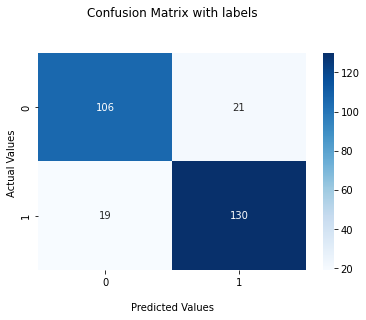

In [ ]:
# now, visualize confusion metrix

ax = sns.heatmap(cm, annot=True,fmt='g', cmap='Blues')

ax.set_title('Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');


## Display the visualization of the Confusion Matrix.
plt.show()

**Classification Report**

In [ ]:
print(classification_report(y_test,y_pred_adaboost))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84       127
           1       0.86      0.87      0.87       149

    accuracy                           0.86       276
   macro avg       0.85      0.85      0.85       276
weighted avg       0.85      0.86      0.85       276



**ROC (Reciever Operating Charecteristic) curve**

It is a plot of the true positive rate against the false positive rate for the different possible cutpoints of a diagnostic test.

An ROC curve demonstrates several things:

1) It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).

2) The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.

3)The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

4) The area under the curve is a measure of test accuracy.

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_adaboost)

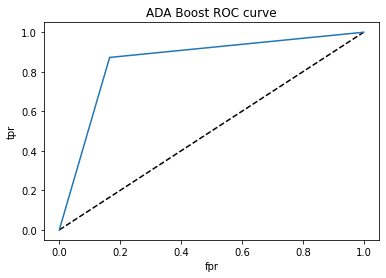

In [ ]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ADA')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ADA Boost ROC curve')
plt.show()

In [ ]:
roc_auc_score(y_test,y_pred_proba)

0.7794747133118428

**Cross Validation**

In [ ]:
# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, x_train, y_train, cv=5)

# Print the mean and standard deviation of the cross-validation scores
print("Cross-validation scores: ", cv_scores)
print("Mean accuracy: ", cv_scores.mean())
print("Standard deviation: ", cv_scores.std())

Cross-validation scores:  [0.89147287 0.8372093  0.9140625  0.8828125  0.8125    ]
Mean accuracy:  0.867611434108527
Standard deviation:  0.037201348768163126


In [ ]:
# Define the hyperparameter grid to search over
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.5, 1.0, 1.5],
}

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(x_train, y_train)

# Print the best hyperparameters and the best cross-validation score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

Best hyperparameters:  {'learning_rate': 0.5, 'n_estimators': 100}
Best cross-validation score:  0.8645469961240309


# SVM

In [ ]:
start_time = time.time()

# Train the SVM model
model = svm.SVC(kernel='linear', C=1)
model.fit(x_train, y_train)

print("Time taken to train the SVM model: ", time.time() - start_time, "seconds")

# Make predictions on the test data
y_pred_svm = model.predict(x_test)

Time taken to train the SVM model:  4.111272096633911 seconds


**SVM Accuracy**

In [ ]:
svm_accuracy = model.score(x_test,y_test)
print('svm accuracy')
print(svm_accuracy)

svm accuracy
0.8442028985507246


Confusion matrix:


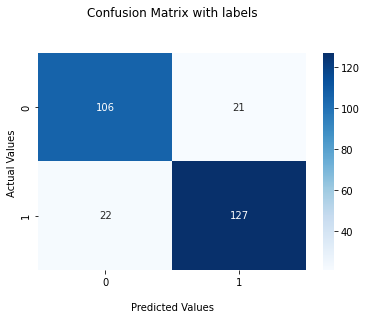

In [ ]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_svm)
print('Confusion matrix:')

# now, visualize confusion metrix

ax = sns.heatmap(cm, annot=True,fmt='g', cmap='Blues')

ax.set_title('Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');


## Display the visualization of the Confusion Matrix.
plt.show()

**Classification Report**

In [ ]:
print(classification_report(y_test,y_pred_svm))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       127
           1       0.86      0.85      0.86       149

    accuracy                           0.84       276
   macro avg       0.84      0.84      0.84       276
weighted avg       0.84      0.84      0.84       276



**ROC (Reciever Operating Charecteristic) curve**

It is a plot of the true positive rate against the false positive rate for the different possible cutpoints of a diagnostic test.

An ROC curve demonstrates several things:

1) It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).

2) The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.

3)The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

4) The area under the curve is a measure of test accuracy.

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_svm)

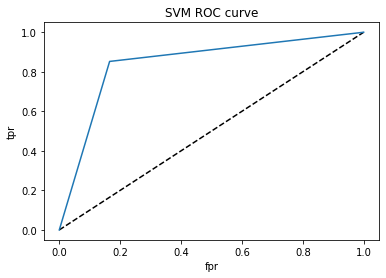

In [ ]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='SVM')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('SVM ROC curve')
plt.show()

In [ ]:
roc_auc_score(y_test,y_pred_svm)

0.8434973312899645

**Cross Validation**

In [ ]:
# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, x_train, y_train, cv=5)

# Print the mean and standard deviation of the cross-validation scores
print("Cross-validation scores: ", cv_scores)
print("Mean accuracy: ", cv_scores.mean())
print("Standard deviation: ", cv_scores.std())

Cross-validation scores:  [0.84496124 0.82170543 0.8828125  0.875      0.8125    ]
Mean accuracy:  0.8473958333333332
Standard deviation:  0.02792838603638348


In [ ]:
# Define the hyperparameter grid to search over
# Define the hyperparameter grid to search over
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.01, 0.1, 1],
    'kernel': ['linear', 'rbf']
}

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(x_train, y_train)

# Print the best hyperparameters and the best cross-validation score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

Best hyperparameters:  {'C': 0.1, 'gamma': 0.01, 'kernel': 'linear'}
Best cross-validation score:  0.8520591085271316


# Summary

**Accuray of all classifier algorithms**

In [ ]:
print('Pruned Decision Tree: ', dt_accuracy)
print('Neural Network: ', nn_accuracy)
print('SVM: ', svm_accuracy)
print('KNN: ', knn_accuracy)
print('ADABoost: ', adaboost_accuracy)

Pruned Decision Tree:  0.8297101449275363
Neural Network:  0.8043478260869565
SVM:  0.8442028985507246
KNN:  0.7318840579710145
ADABoost:  0.855072463768116


In [ ]:
fnl = pd.DataFrame({
    'Pruned Decision Tree' : dt_accuracy,
    'Neural Network' : nn_accuracy,
    'SVM' : svm_accuracy,
    'KNN' : knn_accuracy,
    'ADABoost': adaboost_accuracy,
}, columns=['Pruned Decision Tree', 'Neural Network', 'SVM', 'KNN', 'ADABoost',],index=[0])

fnl = fnl.T
fnl

,0
Pruned Decision Tree,0.829710
Neural Network,0.804348
SVM,0.844203
KNN,0.731884
ADABoost,0.855072


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, 'Pruned Decision Tree'),
 Text(0, 0, 'Neural Network'),
 Text(0, 0, 'SVM'),
 Text(0, 0, 'KNN'),
 Text(0, 0, 'ADABoost')]

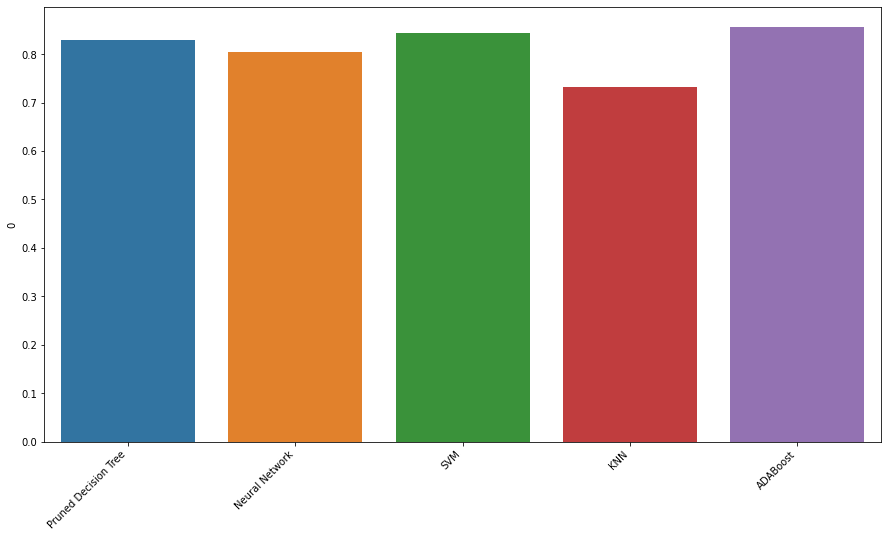

In [ ]:
fig = plt.figure(figsize=(15,8))

ax = sns.barplot(fnl.index,fnl[0])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")